In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# read in data file
shark_df = pd.read_csv("shark_geo.csv")

In [3]:
# remove 2021 data
shark_df = shark_df.loc[shark_df['Year']<=2020]

In [4]:
shark_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 16 to 160
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      145 non-null    int64  
 1   Case Number     145 non-null    object 
 2   Date            145 non-null    object 
 3   Year            145 non-null    float64
 4   Type            145 non-null    object 
 5   Country         145 non-null    object 
 6   Area            145 non-null    object 
 7   Location        145 non-null    object 
 8   Activity        140 non-null    object 
 9   Sex             140 non-null    object 
 10  Age             103 non-null    object 
 11  Injury          144 non-null    object 
 12  Fatal (Y/N)     138 non-null    object 
 13  Time            120 non-null    object 
 14  Species         94 non-null     object 
 15  pdf             145 non-null    object 
 16  href formula    145 non-null    object 
 17  href            145 non-null    ob

In [5]:
# group attacks by year
attack_by_year_total = shark_df.groupby('Year')['Case Number'].count()

# split into WA and non-WA
attack_by_year_WA = shark_df.loc[shark_df['Area']=='Western Australia'].groupby('Year')['Case Number'].count()
attack_by_year_other = shark_df.loc[shark_df['Area']!='Western Australia'].groupby('Year')['Case Number'].count()

attack_dictionary = {"WA":attack_by_year_WA, "Other":attack_by_year_other, "Total":attack_by_year_total}

attack_by_year = pd.concat(attack_dictionary, axis = 1)
attack_by_year.index = attack_by_year.index.astype(int)

attack_by_year

,WA,Other,Total
2016,8,24,32
2017,8,15,23
2018,13,25,38
2019,3,19,22
2020,8,22,30


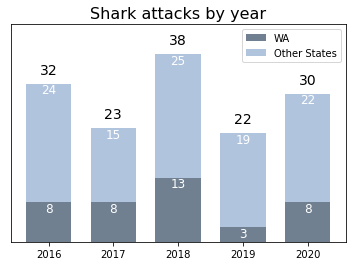

In [19]:
# create bar chart
fig, ax = plt.subplots()

ax.set_title("Shark attacks by year", size = 16)

p1 = ax.bar(attack_by_year.index, attack_by_year['WA'], label = 'WA', color = "slategray", width = 0.7 )
p2 = ax.bar(attack_by_year.index, attack_by_year['Other'], bottom = attack_by_year['WA'], label = 'Other States', color = "lightsteelblue", width = 0.7)

ax.legend()

ax.yaxis.set_visible(False)
ax.set_ylim(0,attack_by_year['Total'].max() + 6)

# add totals labels
y_offset = 2
for i, total in enumerate(attack_by_year['Total']):
    ax.text(attack_by_year['Total'].index[i], total + y_offset, total, ha='center',
           size = 14)

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -2
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      size=12
  )


